<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Homework9 Школа DataScientist, декабрь 2022, Андреева Ольга

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=Warning)

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('csv4ml//winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:
from sklearn.model_selection import train_test_split

y = data['quality'] #целевая переменная
X = data.drop(columns=['quality']) #все остальное

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE)

print (len(X_train)/len(data), len(X_test)/len(data))

0.699812382739212 0.300187617260788


2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

v_estimators=100

DT = DecisionTreeClassifier(random_state=RANDOM_STATE).fit(X_train, y_train)
y_pred = DT.predict(X_test)
acc_DT =  accuracy_score(y_test, y_pred)


Bagging = BaggingClassifier(n_estimators=v_estimators, random_state=RANDOM_STATE).fit(X_train, y_train)
y_pred = Bagging.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred)


RF = RandomForestClassifier(n_estimators=v_estimators, random_state=RANDOM_STATE).fit(X_train, y_train)
y_pred = RF.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)


results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

pd.options.display.float_format ='{:,.20f}'.format
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407


Вывод: Композиционные методы дают ощутимо лучший результат по сравнению с одним деревом.

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



Wall time: 4min 7s


<AxesSubplot: >

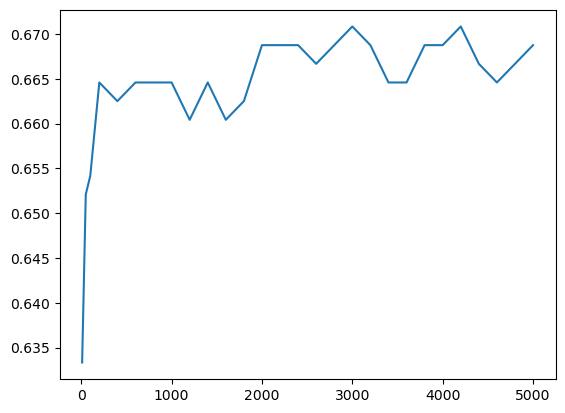

In [7]:
%%time
#import matplotlib as plt
v_estimators=[10, 50, 100]
v_estimators.extend(range(200, 5001, 200))
acc_RF = pd.Series(index=v_estimators, data=[0]*len(v_estimators))
for n in v_estimators:
    #print (n)
    RF = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE).fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    acc_RF.loc[n] = accuracy_score(y_test, y_pred)

acc_RF.plot()   

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier 

gb_sklearn = GradientBoostingClassifier()
acc_sklearn = cross_val_score(gb_sklearn, X, y, scoring='accuracy').mean()

gb_xgboost = XGBClassifier()
acc_xgboost = cross_val_score(gb_xgboost, X, y, scoring='accuracy').mean()


results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [11]:
%%time

from sklearn.model_selection import GridSearchCV

learning_rates = np.arange(0.05, 1.0, 0.15)
trees_counts = [8, 10, 20, 50, 100, 150, 200, 250]
trees_depth = range(3, 16)

params = {'learning_rate':learning_rates, 'n_estimators':trees_counts, 'max_depth':trees_depth} 
gb_sklearn_cv = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gb_sklearn_cv.fit(X_train, y_train)
y_pred = gb_sklearn_cv.predict(X_test)
acc_sklearn_cv = accuracy_score(y_test, y_pred)

best_params_sklearn = gb_sklearn_cv.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]

gs_params = {'learning_rate':learning_rates, 'n_estimators':trees_counts, 'max_depth':trees_depth} 
gb_xgboost_cv = GridSearchCV(XGBClassifier(), gs_params, cv=3)
gb_xgboost_cv.fit(X_train, y_train)
y_pred = gb_xgboost_cv.predict(X_test)
acc_xgboost_cv = accuracy_score(y_test, y_pred)

best_params_xgboost =  gb_xgboost_cv.best_params_
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)


results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]
results

Параметры лучшей модели sklearn:
 {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
Wall time: 1h 46min 9s


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [12]:
%%time 
pd.set_option("max_colwidth", 0)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

gb_lightgbm = LGBMClassifier()
acc_lightgbm = cross_val_score(gb_lightgbm, X, y, scoring='accuracy').mean()

gb_catboost = CatBoostClassifier(logging_level='Silent')
acc_catboost = cross_val_score(gb_catboost, X, y, scoring='accuracy').mean()

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]
results

Wall time: 50.8 s


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966
7,LGBMClassifier,task6,0.55724725705329147818
8,CatBoostClassifier,task6,0.54597570532915351560


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [13]:
%%time

learning_rates = np.arange(0.05, 1.0, 0.15)
trees_counts = [50, 100, 150, 200, 250]
trees_depth = range(3, 16)
gs_params = {'learning_rate':learning_rates, 'n_estimators':trees_counts, 'max_depth':trees_depth} 

gb_lightgbm_cv = GridSearchCV(LGBMClassifier(), gs_params, cv=3)
gb_lightgbm_cv.fit(X_train, y_train)
y_pred = gb_lightgbm_cv.predict(X_test)
acc_lightgbm_cv = accuracy_score(y_test, y_pred)

best_params_lightgbm = gb_lightgbm_cv.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)


results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]


Параметры лучшей модели lightgbm:
 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Wall time: 6min 41s


In [32]:
%%time

learning_rates = np.arange(0.05, 1.0, 0.15)
trees_counts = [50, 100, 150, 200]
trees_depth = range(3, 6)
gs_params = {'learning_rate':learning_rates, 'n_estimators':trees_counts, 'depth':trees_depth} 

gb_catboost_cv = GridSearchCV(CatBoostClassifier(logging_level='Silent'), gs_params, cv=3)

gb_catboost_cv.fit(X_train, y_train)
y_pred = gb_catboost_cv.predict(X_test)
acc_catboost_cv = accuracy_score(y_test, y_pred)


best_params_catboost = gb_catboost_cv.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)

results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

results

Параметры лучшей модели catboost:
 {'depth': 5, 'learning_rate': 0.5000000000000001, 'n_estimators': 150}
Wall time: 1min 51s


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966
7,LGBMClassifier,task6,0.55724725705329147818
8,CatBoostClassifier,task6,0.54597570532915351560
9,LGBMClassifier_CV,task7,0.67500000000000004441


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [71]:
%%time
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params_xgboost_optuna = study.best_params
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = study.best_value
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]
results

Параметры лучшей модели xgboost:
 {'max_depth': 8, 'learning_rate': 0.11526314040105784, 'n_estimators': 342}
Wall time: 3min 9s


,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966
7,LGBMClassifier,task6,0.55724725705329147818
8,CatBoostClassifier,task6,0.54597570532915351560
9,LGBMClassifier_CV,task7,0.67500000000000004441


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [72]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('gb_sklearn', GradientBoostingClassifier()),
    ('gb_xgboost', XGBClassifier()),
    ('gb_lightgbm', LGBMClassifier()),
    ('gb_catboost', CatBoostClassifier(logging_level='Silent'))
    ]

stacking_default = StackingClassifier(estimators=estimators)
stacking_default.fit(X_train, y_train)
y_pred = stacking_default.predict(X_test)
    
acc_stacking_default = accuracy_score(y_test, y_pred)

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966
7,LGBMClassifier,task6,0.55724725705329147818
8,CatBoostClassifier,task6,0.54597570532915351560
9,LGBMClassifier_CV,task7,0.67500000000000004441


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [73]:
%%time 
#найду оптимальные параметры для всех алгоритмов через optuna,
#т.к. она показала лучший результат (и быстррее работает), чем GridSearchCV

#optuna for sklearn GradientBoostingClassifier
def objective_sk(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_sk, n_trials=50,  n_jobs=2)

best_params_sklearn_optuna = study.best_params
print(best_params_sklearn_optuna, study.best_value)
results.loc[13] = ['GradientBoostingClassifier_optuna', 'task10', study.best_value]

{'max_depth': 4, 'learning_rate': 0.03931845582503984, 'n_estimators': 263} 0.6791666666666667
Wall time: 5min 15s


In [74]:
%%time 
#optuna for lightgbm 
def objective_lgbm(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_lgbm, n_trials=50,  n_jobs=2)

best_params_lightgbm_optuna = study.best_params
print(best_params_lightgbm_optuna, study.best_value)
results.loc[14] = ['LGBMClassifier_optuna', 'task10', study.best_value]

{'max_depth': 12, 'learning_rate': 0.06642924588027438, 'n_estimators': 260} 0.6854166666666667
Wall time: 59.2 s


In [75]:
%%time 
# optuna for CatBoostClassifier() 

def objective_cb(trial):
    params = {
        'depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.05, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }

    model = CatBoostClassifier(**params, logging_level='Silent')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_cb, n_trials=50,  n_jobs=2)

best_params_catboost_optuna = study.best_params
print(best_params_catboost_optuna, study.best_value)
results.loc[15] = ['CatBoostClassifier', 'task10', study.best_value]

{'max_depth': 8, 'learning_rate': 0.11144497706089726, 'n_estimators': 453} 0.6895833333333333
Wall time: 4min 44s


In [76]:
estimators = [
    ('gb_sklearn', GradientBoostingClassifier(**best_params_sklearn)),
    ('gb_xgboost', XGBClassifier(**best_params_xgboost)),
    ('gb_lightgbm', LGBMClassifier(**best_params_lightgbm)),
    ('gb_catboost', CatBoostClassifier(**best_params_catboost, logging_level='Silent'))
    ]

stacking = StackingClassifier(estimators=estimators)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred)

results.loc[16] = ['Stacking', 'task10', acc_stacking]



In [77]:
estimators = [
    ('gb_sklearn', GradientBoostingClassifier(**best_params_sklearn_optuna)),
    ('gb_xgboost', XGBClassifier(**best_params_xgboost_optuna)),
    ('gb_lightgbm', LGBMClassifier(**best_params_lightgbm_optuna)),
    ('gb_catboost', CatBoostClassifier(**best_params_catboost_optuna, logging_level='Silent'))
    ]

stacking = StackingClassifier(estimators=estimators)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred)

results.loc[17] = ['Stacking_optuna', 'task10', acc_stacking]

In [78]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.57291666666666662966
1,BaggingClassifier,task2,0.64166666666666671848
2,RandomForestClassifier,task2,0.65416666666666667407
3,GradientBoostingClassifier,task4,0.56097570532915352892
4,XGBClassifier,task4,0.54723354231974918882
5,GradientBoostingClassifier_CV,task5,0.64791666666666669627
6,XGBClassifier_CV,task5,0.66666666666666662966
7,LGBMClassifier,task6,0.55724725705329147818
8,CatBoostClassifier,task6,0.54597570532915351560
9,LGBMClassifier_CV,task7,0.67500000000000004441


1) Результаты стекинга 4х реализаций градиентного бустинга с дефолтными и параметрами и подобранными с помощью optuna совпадают.
Из чего можно сделать вывод, что алгоритмы реализованы по-разному и с дефолтными параметрами видят разные зависимости в данных. В итоге применение стеккинга компенсирует те оптимизации, которые мы искали подбором параметров для отдельных алгоритмов.

2) Выглядит странно, что результат стекинга с дефолтными параметрами получился чуть лучше, чем с подобранными с помощью GridSearchCV.
Могу предположить, что алгоритмы оптимизировались "в разные стороны", стали выдавать правильный результат на разных частях тестовых данных. А область, где несколько алгоритмов выдавало бы одинаковый и правильный результат, в результате уменьшилась.